<a href="https://colab.research.google.com/github/gustavo-ifusp/exercicios_programacao_usp/blob/main/EP_2_Calculo_numerico_Gustavo_de_andrade_8669592.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2o. PROGRAMA - Solução de Sistemas de Equações Lineares

Gustavo de Andrade - Nº USP - 8669592

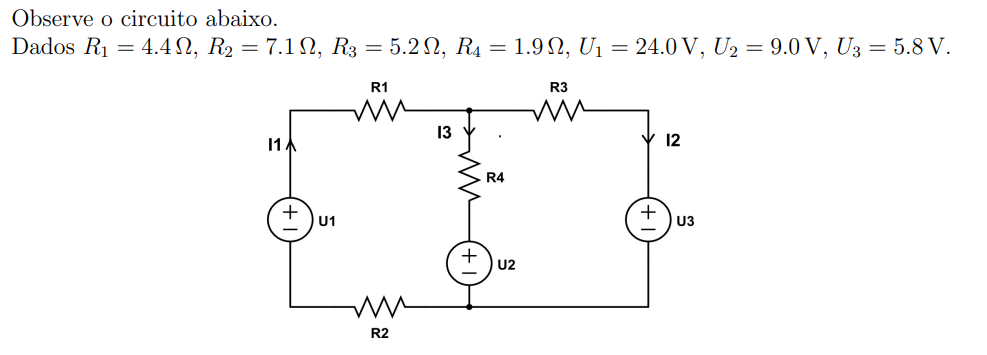

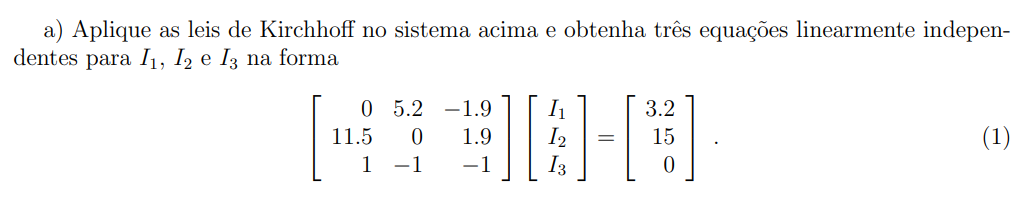

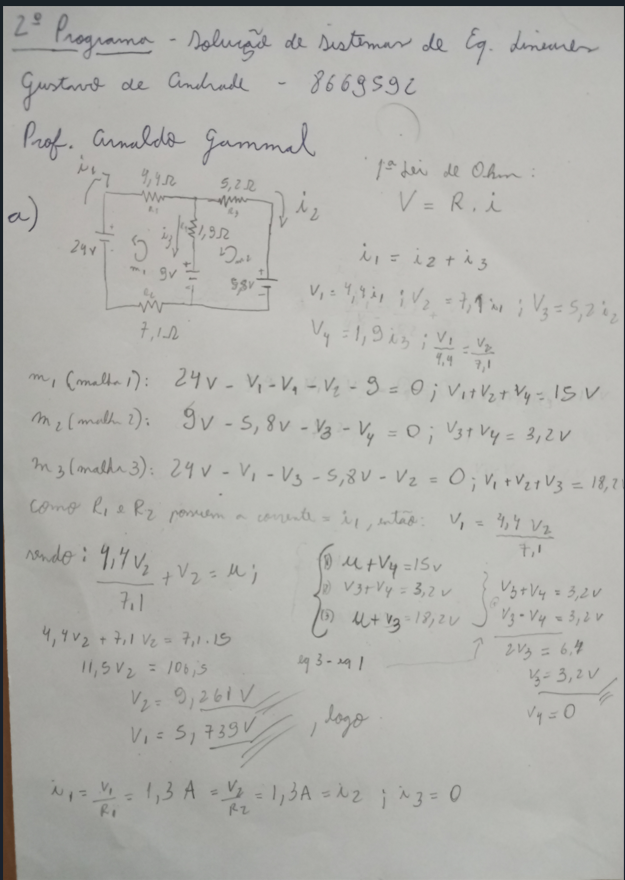

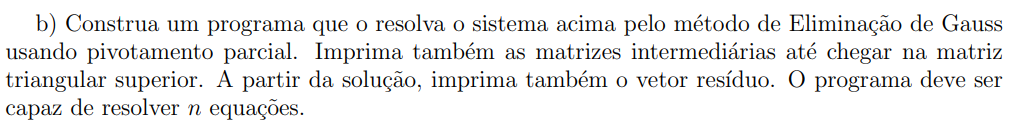

In [ ]:
import numpy as np
import pandas as pd
import math

In [ ]:
def metodo_gauss(A, B):
    n = len(B)
    X = np.zeros(n)

    for k in range(n):
        linha = np.argmax(np.abs(A[k:, k])) + k

        A[[k, linha]] = A[[linha, k]] #pivo maior possível
        B[k], B[linha] = B[linha], B[k]

        for i in range(k + 1, n):
            razao = A[i, k] / A[k, k]
            B[i] -= razao * B[k]
            A[i, k:] -= razao * A[k, k:]

        print(f"Matriz Intermediária {k+1}:\n{A}\n{B}\n")

    for i in range(n - 1, -1, -1):
        X[i] = (B[i] - np.dot(A[i, i+1:], X[i+1:])) / A[i, i]

    return X

A = np.array([[0, 5.2, -1.9], [11.5, 0, 1.9], [1, -1, -1]], dtype=float)
B = np.array([3.2, 15, 0], dtype=float)

solucao = metodo_gauss(A, B)
print("Solução do sistema:")
print(solucao)

residual = np.dot(A, solucao) - B
print("Vetor de resíduo:")
print(residual)


Matriz Intermediária 1:
[[11.5         0.          1.9       ]
 [ 0.          5.2        -1.9       ]
 [ 0.         -1.         -1.16521739]]
[15.          3.2        -1.30434783]

Matriz Intermediária 2:
[[11.5         0.          1.9       ]
 [ 0.          5.2        -1.9       ]
 [ 0.          0.         -1.53060201]]
[15.          3.2        -0.68896321]

Matriz Intermediária 3:
[[11.5         0.          1.9       ]
 [ 0.          5.2        -1.9       ]
 [ 0.          0.         -1.53060201]]
[15.          3.2        -0.68896321]

Solução do sistema:
[1.22997924 0.7798536  0.45012564]
Vetor de resíduo:
[1.77635684e-15 0.00000000e+00 0.00000000e+00]


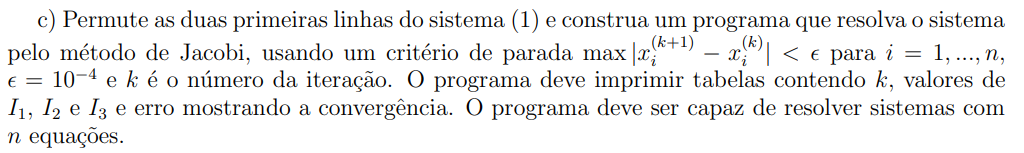

In [ ]:
def metodo_jacobi(A, B, E=1e-4, max_interacoes=100):
    n = len(B)
    X = np.zeros(n)
    X_new = np.zeros(n)
    interacao = 0

    while interacao < max_interacoes:
        for i in range(n):
            sum_term = 0
            for j in range(n):
                if j != i:
                    sum_term += A[i, j] * X[j]
            X_new[i] = (B[i] - sum_term) / A[i, i]
        erro = np.max(np.abs(X_new - X))
        X = X_new.copy()
        print(f"Interação {interacao+1}:")
        print(f"I1: {X[0]:.6f}, I2: {X[1]:.6f}, I3: {X[2]:.6f}, Erro: {erro:.6f}")
        if erro < E:
            break
        interacao += 1
    return X

A = np.array([[11.5, 0, 1.9], [0, 5.2, -1.9], [1, -1, -1]], dtype=float)
C = np.array([3.2, 15, 0], dtype=float)
E = 1e-4

vetor_b = metodo_jacobi(A, C, E)

print("\nSolução final do sistema:")
print(f"I1: {vetor_b[0]:.6f}, I2: {vetor_b[1]:.6f}, I3: {vetor_b[2]:.6f}")


Interação 1:
I1: 0.278261, I2: 2.884615, I3: -0.000000, Erro: 2.884615
Interação 2:
I1: 0.278261, I2: 2.884615, I3: -2.606355, Erro: 2.606355
Interação 3:
I1: 0.708876, I2: 1.932294, I3: -2.606355, Erro: 0.952322
Interação 4:
I1: 0.708876, I2: 1.932294, I3: -1.223418, Erro: 1.382937
Interação 5:
I1: 0.480391, I2: 2.437597, I3: -1.223418, Erro: 0.505304
Interação 6:
I1: 0.480391, I2: 2.437597, I3: -1.957207, Erro: 0.733789
Interação 7:
I1: 0.601625, I2: 2.169482, I3: -1.957207, Erro: 0.268115
Interação 8:
I1: 0.601625, I2: 2.169482, I3: -1.567857, Erro: 0.389350
Interação 9:
I1: 0.537298, I2: 2.311745, I3: -1.567857, Erro: 0.142262
Interação 10:
I1: 0.537298, I2: 2.311745, I3: -1.774447, Erro: 0.206590
Interação 11:
I1: 0.571430, I2: 2.236260, I3: -1.774447, Erro: 0.075485
Interação 12:
I1: 0.571430, I2: 2.236260, I3: -1.664830, Erro: 0.109617
Interação 13:
I1: 0.553320, I2: 2.276312, I3: -1.664830, Erro: 0.040052
Interação 14:
I1: 0.553320, I2: 2.276312, I3: -1.722993, Erro: 0.058163
I

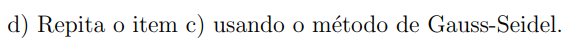

In [ ]:
def metodo_gauss_seidel(A, B, E=1e-4, max_interacoes=100):
    n = len(B)
    X = np.zeros(n)
    iteration = 0

    while iteration < max_interacoes:
        erro = 0.0
        for i in range(n):
            soma = 0
            for j in range(n):
                if j != i:
                    soma += A[i, j] * X[j]
            X_n = (B[i] - soma) / A[i, i]
            erro = max(erro, abs(X_n - X[i]))
            X[i] = X_n
        print(f"Iteração {iteration+1}:")
        print(f"I1: {X[0]:.6f}, I2: {X[1]:.6f}, I3: {X[2]:.6f}, Erro: {erro:.6f}")
        if erro < E:
            break

        iteration += 1

    return X

A = np.array([[11.5, 0, 1.9], [0, 5.2, -1.9], [1, -1, -1]], dtype=float)
C = np.array([3.2, 15, 0], dtype=float)
E = 1e-4

vetor_B = metodo_gauss_seidel(A, C, E)

print("\nSolução final do sistema:")
print(f"I1: {vetor_B[0]:.6f}, I2: {vetor_B[1]:.6f}, I3: {vetor_B[2]:.6f}")


Iteração 1:
I1: 0.278261, I2: 2.884615, I3: -2.606355, Erro: 2.884615
Iteração 2:
I1: 0.708876, I2: 1.932294, I3: -1.223418, Erro: 1.382937
Iteração 3:
I1: 0.480391, I2: 2.437597, I3: -1.957207, Erro: 0.733789
Iteração 4:
I1: 0.601625, I2: 2.169482, I3: -1.567857, Erro: 0.389350
Iteração 5:
I1: 0.537298, I2: 2.311745, I3: -1.774447, Erro: 0.206590
Iteração 6:
I1: 0.571430, I2: 2.236260, I3: -1.664830, Erro: 0.109617
Iteração 7:
I1: 0.553320, I2: 2.276312, I3: -1.722993, Erro: 0.058163
Iteração 8:
I1: 0.562929, I2: 2.255060, I3: -1.692131, Erro: 0.030861
Iteração 9:
I1: 0.557830, I2: 2.266337, I3: -1.708506, Erro: 0.016375
Iteração 10:
I1: 0.560536, I2: 2.260353, I3: -1.699818, Erro: 0.008689
Iteração 11:
I1: 0.559100, I2: 2.263528, I3: -1.704428, Erro: 0.004610
Iteração 12:
I1: 0.559862, I2: 2.261844, I3: -1.701982, Erro: 0.002446
Iteração 13:
I1: 0.559458, I2: 2.262737, I3: -1.703280, Erro: 0.001298
Iteração 14:
I1: 0.559672, I2: 2.262263, I3: -1.702591, Erro: 0.000689
Iteração 15:
I1

**Ambiente de  Testes:**

In [ ]:
A = np.array([[0, 5.2, -1.9],
              [11.5, 0, 1.9],
              [1, -1, -1]])
C = np.array([3.2, 15, 0])

In [ ]:
def metodo_gauss(A, C):
    n = len(C)
    x = np.zeros(n)
    for i in range(n):
        linha_matriz = i
        for k in range(i + 1, n):
            if abs(A[k, i]) > abs(A[linha_matriz, i]):
                linha_matriz = k
        A[[i, linha_matriz]] = A[[linha_matriz, i]]
        C[i], C[linha_matriz] = C[linha_matriz], C[i]
        for k in range(i + 1, n):
            razao = A[k, i] / A[i, i]
            for j in range(i, n):
                A[k, j] -= razao * A[i, j]
            C[k] -= razao * C[i]
    for i in range(n - 1, -1, -1):
        x[i] = C[i] / A[i, i]
    return x